Імпорт необхідних бібліотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Activation Functions

ReLU (Rectified Linear Unit)

In [2]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)


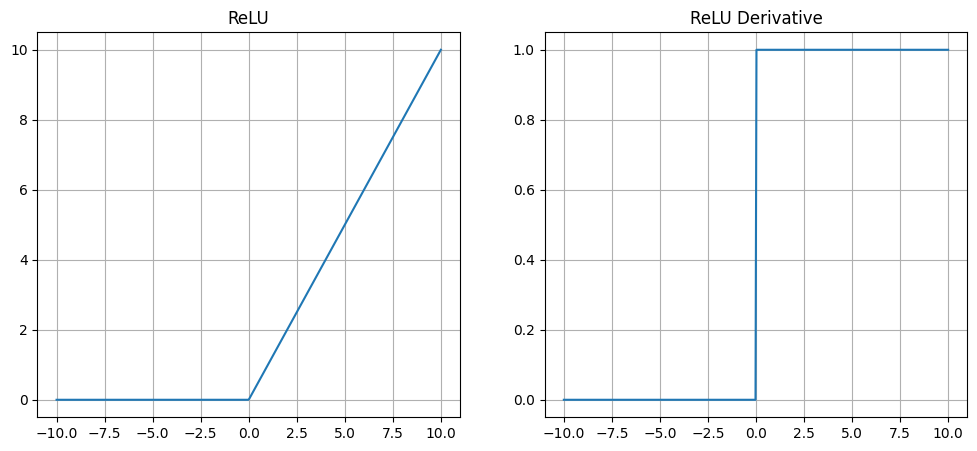

In [3]:

# Візуалізація ReLU та її похідної
x = np.linspace(-10, 10, 400)
y = relu(x)
dy = relu_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title("ReLU")
plt.plot(x, y)
plt.grid()

plt.subplot(1, 2, 2)
plt.title("ReLU Derivative")
plt.plot(x, dy)
plt.grid()
plt.show()


ELU (Exponential Linear Unit)

In [4]:
def elu(x, alpha=1.0):
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def elu_derivative(x, alpha=1.0):
    return np.where(x > 0, 1, alpha * np.exp(x))

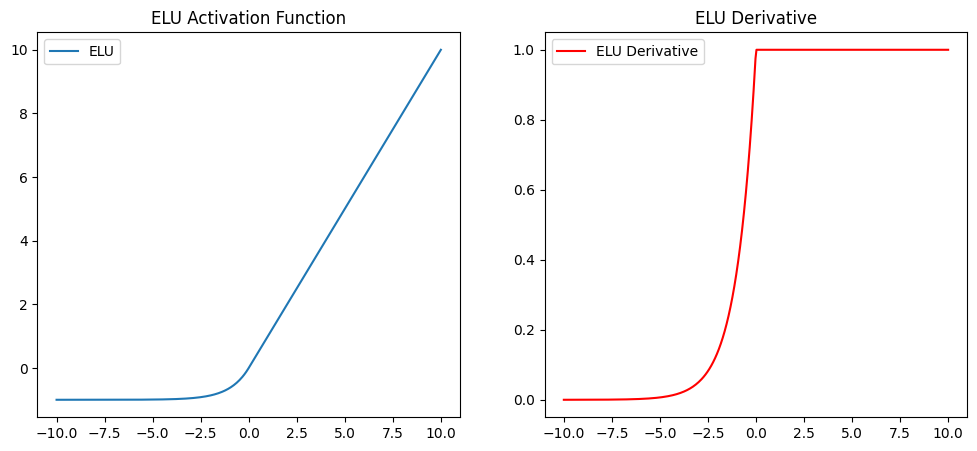

In [5]:
# Графік функції та її похідної
y = elu(x)
dy = elu_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='ELU')
plt.title('ELU Activation Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy, label='ELU Derivative', color='r')
plt.title('ELU Derivative')
plt.legend()

plt.show()

Swish

In [6]:
def swish(x):
    return x * (1 / (1 + np.exp(-x)))

def swish_derivative(x):
    sigma = 1 / (1 + np.exp(-x))
    return sigma + x * sigma * (1 - sigma)

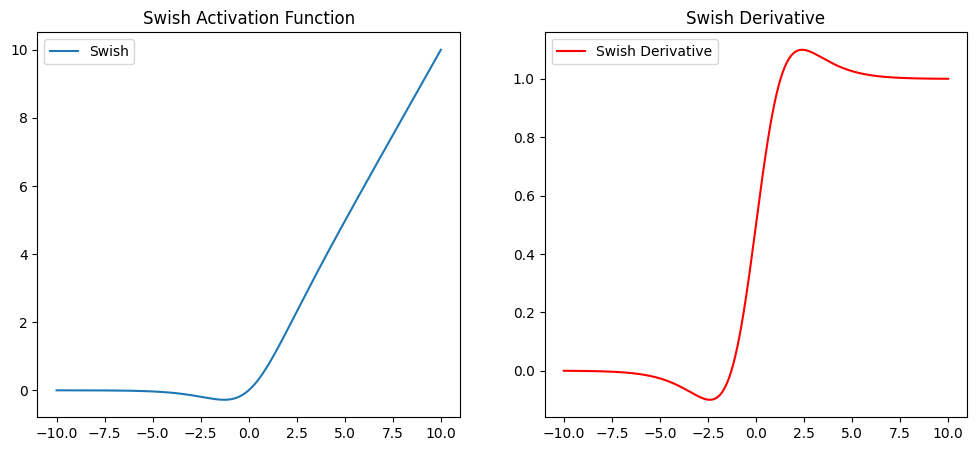

In [7]:
# Графік функції та її похідної
y = swish(x)
dy = swish_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Swish')
plt.title('Swish Activation Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy, label='Swish Derivative', color='r')
plt.title('Swish Derivative')
plt.legend()

plt.show()

GeLU (Gaussian Error Linear Unit)

In [8]:
from scipy.stats import norm

def gelu(x):
    return x * norm.cdf(x)

def gelu_derivative(x):
    return norm.pdf(x) + x * norm.cdf(x)

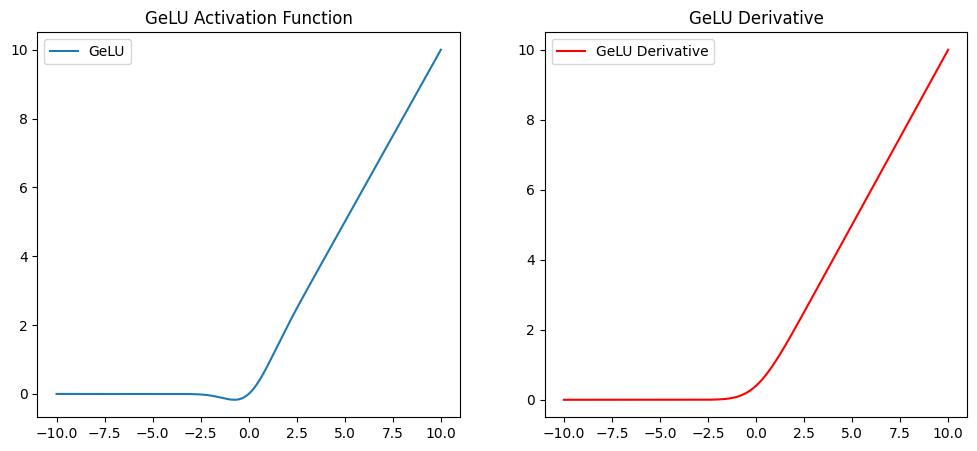

In [9]:
# Графік функції та її похідної
y = gelu(x)
dy = gelu_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='GeLU')
plt.title('GeLU Activation Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy, label='GeLU Derivative', color='r')
plt.title('GeLU Derivative')
plt.legend()

plt.show()

PReLU (Parametric Rectified Linear Unit)

In [10]:
def prelu(x, alpha=0.1):
    return np.where(x > 0, x, alpha * x)

def prelu_derivative(x, alpha=0.1):
    return np.where(x > 0, 1, alpha)

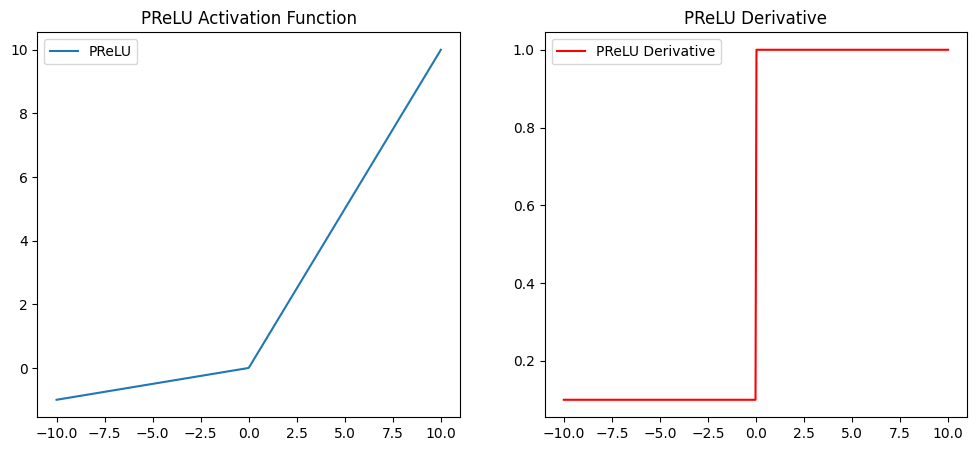

In [11]:
# Графік функції та її похідної
y = prelu(x)
dy = prelu_derivative(x)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='PReLU')
plt.title('PReLU Activation Function')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy, label='PReLU Derivative', color='r')
plt.title('PReLU Derivative')
plt.legend()

plt.show()

Loss Functions

BCE (Binary Cross Entropy)

In [12]:
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12  # small constant to avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1. - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

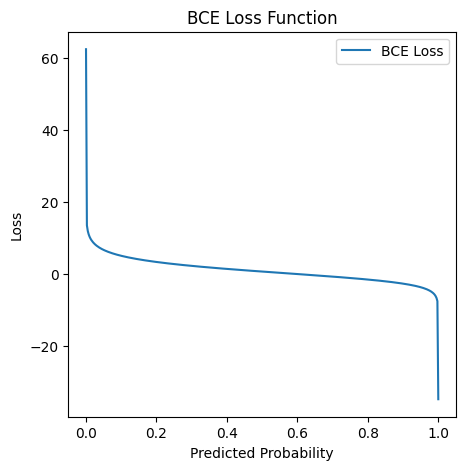

In [13]:
# Приклад використання функції втрат BCE
y_pred = np.linspace(0, 1, 400)  
y_true = np.ones_like(y_pred)  

# Підрахувати значення BCE
bce_values = [binary_cross_entropy(np.array([y]), np.array([y_hat])) for y_hat in y_pred]

# Побудова графіку
plt.figure(figsize=(5, 5))
plt.plot(y_pred, bce_values, label='BCE Loss')
plt.title('BCE Loss Function')
plt.xlabel('Predicted Probability')
plt.ylabel('Loss')
plt.legend()
plt.show()

SE (Squared Error)

In [14]:
def se_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

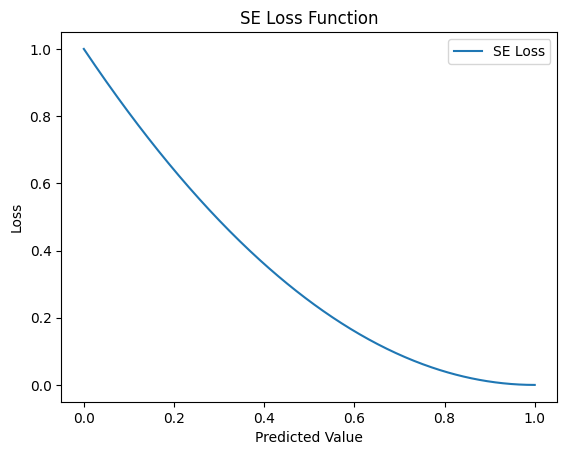

In [15]:
# Підрахувати значення SE
loss = [se_loss(y_true, np.full_like(y_true, yp)) for yp in y_pred]

# Побудова графіку
plt.plot(y_pred, loss, label='SE Loss')
plt.title('SE Loss Function')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.legend()
plt.show()

Huber

In [16]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * error ** 2
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.mean(np.where(is_small_error, squared_loss, linear_loss))

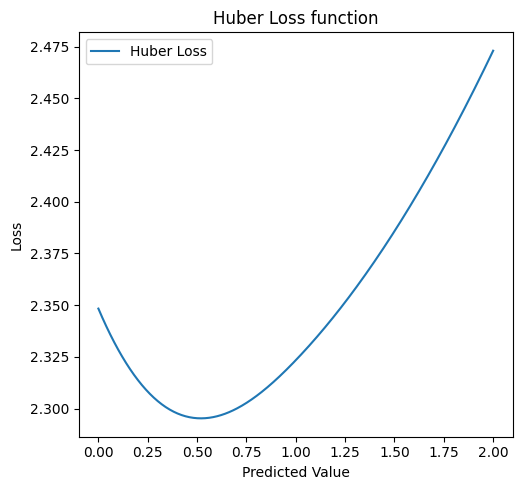

In [17]:
# Приклад використання функції втрат Huber Loss
y_pred = np.linspace(0, 2, 400)
y_true = np.ones_like(y_pred)  

# Підрахувати значення Huber Loss
huber_values = [huber_loss(np.array([y]), np.array([y_hat])) for y_hat in y_pred]

# Побудова графіку
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 3)
plt.plot(y_pred, huber_values, label='Huber Loss')
plt.title('Huber Loss function')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
def huber_loss(y_true, y_pred, delta=1.0):
    error = y_true - y_pred
    is_small_error = np.abs(error) <= delta
    squared_loss = 0.5 * np.square(error)
    linear_loss = delta * (np.abs(error) - 0.5 * delta)
    return np.where(is_small_error, squared_loss, linear_loss).mean()

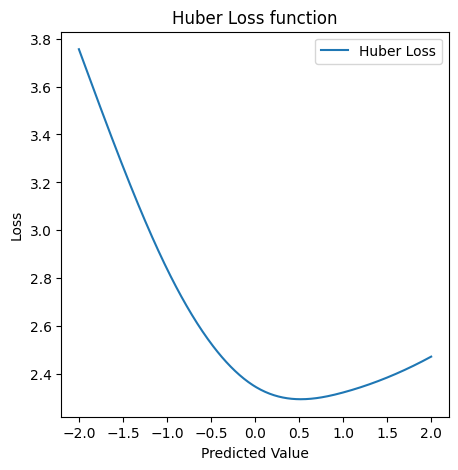

In [19]:
# Приклад використання функції втрат Huber Loss
y_pred = np.linspace(-2, 2, 400)
y_true = np.ones_like(y_pred) 

# Підрахувати значення Huber Loss
huber_values = [huber_loss(np.array([y]), np.array([y_hat])) for y_hat in y_pred]

# Побудова графіку
plt.figure(figsize=(5, 5))
plt.plot(y_pred, huber_values, label='Huber Loss')
plt.title('Huber Loss function')
plt.xlabel('Predicted Value')
plt.ylabel('Loss')
plt.legend()
plt.show()